<a href="https://colab.research.google.com/github/SubhashGovindharaj/Logestic-Regression/blob/main/Logestic_Regressionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[**Data Jar**](https://colab.research.google.com/drive/1HlM_4BKOdEkXrZj-XyoxFh6xrYElP7xS?usp=sharing)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('student_scores.csv')
df #Hours - feature , Score - Target

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }
df = pd.DataFrame(candidates)
df

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [ ]:
#Target variable - binary classification(Categorical)

In [ ]:
df.shape

(40, 4)

### **Data cleaning**

In [ ]:
#misiing values - No
#Duplicates - No
#outliers - No
#Structured data - yes
#Incorrect format?- no

In [ ]:
df.isna().sum()

gmat               0
gpa                0
work_experience    0
admitted           0
dtype: int64

In [ ]:
df = df.dropna()
df.shape

(40, 4)

In [ ]:
for column in df.columns[:3]:
  iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
  upper_threshold = df[column].quantile(0.75) + (1.5 * iqr)
  lower_threshold = df[column].quantile(0.25) - (1.5 * iqr)
  print(upper_threshold, lower_threshold, df[column].describe())

813.75 483.75 count     40.000000
mean     654.000000
std       61.427464
min      540.000000
25%      607.500000
50%      660.000000
75%      690.000000
max      780.000000
Name: gmat, dtype: float64
5.2 1.2000000000000002 count    40.000000
mean      3.095000
std       0.631218
min       1.700000
25%       2.700000
50%       3.300000
75%       3.700000
max       4.000000
Name: gpa, dtype: float64
9.5 -2.5 count    40.000000
mean      3.425000
std       1.737778
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       6.000000
Name: work_experience, dtype: float64


In [ ]:
df.dtypes

gmat                 int64
gpa                float64
work_experience      int64
admitted             int64
dtype: object

### **EDA**

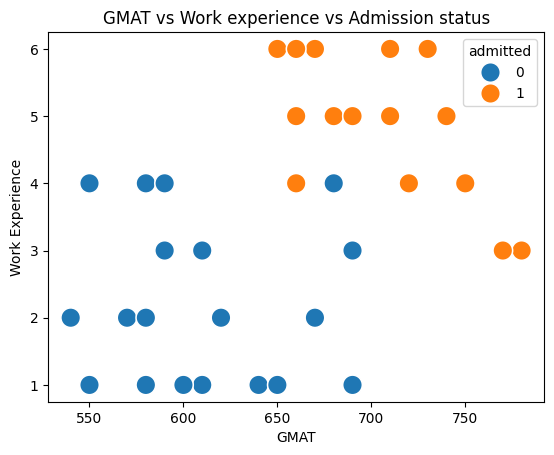

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='gmat',y='work_experience',hue = 'admitted',data=df,s=200)
plt.title('GMAT vs Work experience vs Admission status')
plt.xlabel('GMAT')
plt.ylabel('Work Experience')
plt.show()

In [ ]:
#Linear decision boundary - yes!

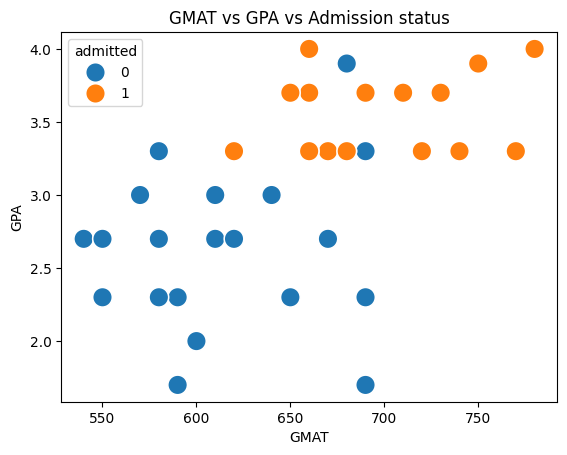

In [ ]:
sns.scatterplot(x='gmat',y='gpa',hue = 'admitted',data=df,s=200)
plt.title('GMAT vs GPA vs Admission status')
plt.xlabel('GMAT')
plt.ylabel('GPA')
plt.show()

In [ ]:
#Linear decision boundarys - yes

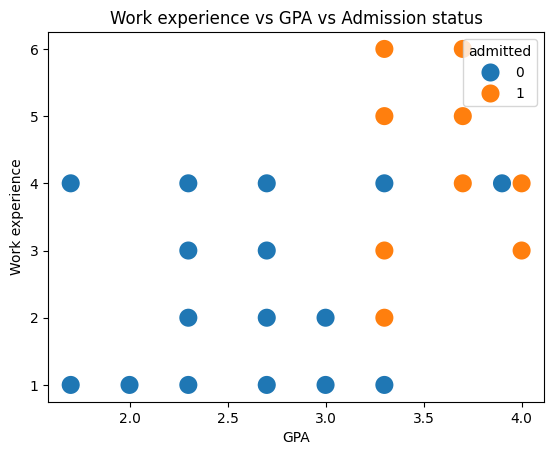

In [ ]:
sns.scatterplot(x='gpa',y='work_experience',hue = 'admitted',data=df,s=200)
plt.title('Work experience vs GPA vs Admission status')
plt.xlabel('GPA')
plt.ylabel('Work experience')
plt.show()

In [ ]:
#Linear boundary - yes

### Encoding

In [ ]:
#No encoding needed!

### **Split**

In [ ]:
from sklearn.model_selection import train_test_split


#df.loc[row_crteria,column_criteria]

X = df.loc[:,df.columns[:3]].values #furst 3 columns our feature
y = df.loc[:,'admitted'].values #target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

In [ ]:
X_train.shape

(30, 3)

### **Scaling**

In [ ]:
# #not mandatory

# from sklearn.linear_model import LinearRegression


# model = LinearRegression() #creating an object.

# model.fit(X_train,y_train) #fit - trainning the data. #all magic will happen - model fit, loss function, gradient descent

# model.predict(X_test) #model [predict]

# model.coef_,model.intercept_

## **Model jar**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train) # all magic happens, cross entropy, gd, thresholding

model.coef_ , model.intercept_

(array([[0.02651608, 0.55005209, 0.78771645]]), array([-22.02803542]))

In [ ]:
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [ ]:
model.predict([[600,3,4]]) , model.predict_proba([[600,3,4]])

(array([0]), array([[0.78874272, 0.21125728]]))

In [ ]:
model.predict([[700,3.8,7]]) , model.predict_proba([[700,3.8,7]])

(array([1]), array([[0.0157129, 0.9842871]]))

In [ ]:
model.predict(X_test),y_test

(array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0]), array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0]))

In [ ]:
model.score(X_test,y_test) #Accuracy. - evalution metric of classification problem.

0.9

## Evaluation metrics

### Accuracy

In [ ]:
model.score(X_test,y_test) #Accuracy. - evalution metric of classification problem.

0.9

### F1-score

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test,model.predict(X_test))

0.888888888888889

### Precision

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test,model.predict(X_test))

0.8

### Au-Roc

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test,model.predict(X_test))

0.9166666666666667